# Iterative Policy Evaluation

In [2]:
children = {
    1: [0, 2, 5, 1],
    2: [1, 3, 6, 2],
    3: [2, 7, 3, 3],
    4: [0, 5, 8, 4],
    5: [1, 4, 6, 9],
    6: [2, 5, 7, 10],
    7: [3, 6, 11, 7],
    8: [4, 9, 12, 8],
    9: [5, 8, 10, 13],
    10: [6, 9, 11, 14],
    11: [0, 7, 10, 11],
    12: [8, 13, 12, 12],
    13: [9, 12, 14, 15],
    14: [10, 13, 0, 14],
    15: [12, 13, 14, 15]
}

In [4]:
V = [0,]*16

In [5]:
import math
while True:
    delta = 0
    for i in range(1, 16):
        v = V[i]
        V[i] = 0
        for child in children[i]:
            V[i] += 0.25*((-1 if child != 0 else 0) + V[child])
        delta = max(delta, abs(v - V[i]))
    print(delta, V)
    if delta < 1e-9:
        break

3.0243619680404663 [0, -0.875, -1.4609375, -1.9144287109375, -0.875, -1.4375, -1.724609375, -2.3246994018554688, -1.4609375, -1.724609375, -1.8623046875, -2.183438777923584, -1.9144287109375, -1.909759521484375, -2.053770065307617, -3.0243619680404663]
2.0014479756355286 [0, -1.78076171875, -2.8811874389648438, -3.3772995471954346, -1.78076171875, -2.752685546875, -3.455219268798828, -4.004986748099327, -2.8811874389648438, -3.3514842987060547, -3.760978102684021, -3.3018640158697963, -3.215213656425476, -3.9112074971199036, -3.2725579999387264, -4.437180985463783]
1.587232617661357 [0, -2.635585308074951, -4.146282538771629, -4.527839565183967, -2.635585308074951, -4.019468545913696, -4.982928983867168, -5.191447676537791, -4.063213519752026, -4.938716916367412, -5.124016979010776, -4.098582704858927, -4.458758209715597, -5.27680352787138, -4.1252564084006735, -5.519005670621141]
1.2550615134296095 [0, -3.4267972139641643, -5.230489300942281, -5.414819131828153, -3.400838145520538, -5

In [6]:
V.append(0)
J = [str(round(i)) for i in V]

In [7]:
for i in range(4):
    print(' '.join(J[4*i:4*i+4]))
print ('   '+str(round(V[15])))

0 -7 -9 -9
-7 -10 -11 -9
-10 -11 -10 -7
-9 -10 -7 -9
   -9


In [8]:
V

[0,
 -6.847539631077711,
 -9.328426833154495,
 -8.633672449122372,
 -6.912720407361489,
 -9.783699988054636,
 -10.569753787424746,
 -9.333774637250063,
 -9.537005317316101,
 -10.804786128166647,
 -9.833113692631107,
 -6.864652603087865,
 -9.000910481531593,
 -10.065325516158387,
 -7.093262252746717,
 -9.362343203261467,
 0]

## Jack's Car Rentals

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sys

def factorial(n):
    fact = 1
    for i in range(2, n+1):
        fact*=i
    return fact

def p(lamb, i):
    if i == 0:
        return [1]
    l = []
    l.append(math.exp(-lamb))
    sum = l[-1]
    for k in range(i):
        if k == 0:
            continue
        l.append(l[-1]*lamb/k)
        sum += l[-1]
    l.append(1-sum)
    return l

In [4]:
# Policy Initialization
V = np.load('v.npy')
from tqdm import tqdm

In [5]:
# Policy Evaluation
while True:
    delta = 0
    for i in tqdm(range(21)):
        for j in range(21):
            v = V[i][j]
            V[i][j] = 0
            count = 0
            for k in range(-5, 6):
                if i-k >= 0 and j+k >= 0:
                    count += 1
                    i_ = i-k
                    j_ = j+k
                    if i_ >= 20:
                        i_ = 20
                    if j_ >= 20:
                        j_ = 20
                    req1 = p(3, i_)
                    ret1 = p(3, 20-i_)
                    req2 = p(4, j_)
                    ret2 = p(2, 20-j_)
#                     print(20-j-k)
                    for p1 in range(len(req1)):
                        for p2 in range(len(ret1)):
                            for p3 in range(len(req2)):
                                for p4 in range(len(ret2)):
                                    V[i][j] += req1[p1]*ret1[p2]*req2[p3]*ret2[p4]*(-2*abs(k) + 10*(p1+p3) + 0.9*V[i_+p2-p1][j_+p4-p3])
            V[i][j] /= count
#             print(V[i][j])
            delta = max(delta, abs(v-V[i][j]))
    print(delta, '-------')
    if delta < 0.01:
        break

100%|███████████████████████████████████████████| 21/21 [00:18<00:00,  1.12it/s]

0.00716407956213061 -------


In [ ]:
len(p(4, 1))

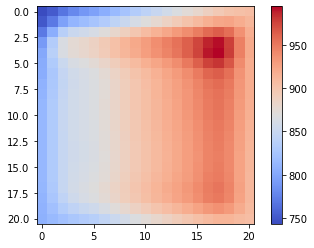

In [120]:
plt.imshow(V, cmap='coolwarm')
plt.colorbar()
plt.show()

In [42]:
V_1 = np.array([[355.66107685, 363.46073069, 373.31368789, 384.16316485,
        394.57403901, 404.26424272, 413.40976758, 422.10837529,
        430.36887643, 438.19542398, 447.0346696 , 454.46476796,
        462.78205609, 469.83003024, 476.54734372, 482.9657697 ,
        489.9286167 , 495.97736167, 501.71118369, 507.04350683,
        512.30246218],
       [361.9568389 , 366.39823244, 376.46022092, 388.98396744,
        400.47552112, 410.52665868, 419.7079301 , 428.35083826,
        436.54028465, 444.29673305, 451.6491321 , 462.23251534,
        469.24210554, 475.92275075, 482.30512877, 491.05510308,
        497.08859831, 502.80413356, 508.15552475, 514.15619523,
        518.72804394],
       [371.05080503, 375.17514688, 385.53506755, 398.28460394,
        409.75961103, 419.75564871, 428.8967857 , 437.50623858,
        445.66526122, 453.39315826, 460.71683821, 467.67498849,
        474.3071255 , 480.64381161, 490.9600611 , 496.9641871 ,
        502.63052296, 507.88490254, 515.40839393, 520.12070567,
        524.77923235],
       [381.64005957, 386.93967771, 397.09428716, 409.2147735 ,
        420.31856471, 430.15757696, 439.22459893, 447.78513925,
        455.90496552, 463.59914119, 470.88999349, 477.81061328,
        484.39586794, 490.67376436, 496.65162597, 502.28351573,
        507.43155412, 515.55676467, 520.23596555, 526.23431208,
        529.8984321 ],
       [390.80593134, 396.3807549 , 406.28592212, 418.17279259,
        429.19562168, 438.95010711, 447.90189739, 456.34137398,
        464.35021644, 471.94735254, 479.15061731, 485.98471871,
        492.47627659, 498.64723112, 504.50175294, 509.99570066,
        515.00428321, 519.41760593, 526.35027294, 530.43348012,
        535.03238571],
       [398.82433881, 404.58173835, 414.24554307, 425.30188154,
        437.13917054, 446.76525872, 455.53431576, 463.77957763,
        471.60841294, 479.04915528, 486.11701556, 492.82735113,
        499.19580722, 505.23495144, 510.94265313, 516.27276379,
        521.10630677, 525.35564626, 529.26802664, 535.54416346,
        539.56951206],
       [407.75869111, 414.59077807, 423.99410577, 433.12114388,
        443.19328186, 452.16510953, 460.44811593, 470.69829526,
        478.28518059, 485.51374132, 492.401194  , 498.95560426,
        505.1809071 , 511.07777289, 516.63492677, 521.80177651,
        526.46190598, 530.54290853, 534.32512736, 540.06551074,
        543.62559524],
       [416.91351409, 424.90391572, 431.86309408, 441.75760875,
        450.8978229 , 459.27677994, 467.34809358, 474.9245529 ,
        484.53585328, 491.49794847, 498.15652296, 504.51769366,
        510.57590279, 516.31912522, 521.72459594, 526.73471985,
        531.2330077 , 535.15804269, 538.81634824, 544.10920086,
        546.96514047],
       [425.50800709, 432.89832731, 441.87925714, 450.88307686,
        459.32406566, 466.20064661, 473.81234328, 481.1581816 ,
        488.10171435, 497.11358292, 503.4972894 , 509.62406658,
        515.4843298 , 521.05540872, 526.30235906, 531.15857564,
        535.5049891 , 539.28776629, 542.83445012, 546.4788777 ,
        550.53699481],
       [433.58934822, 442.03482939, 450.68686503, 459.07461586,
        466.28780572, 473.9541587 , 480.05941774, 487.01950416,
        493.70106399, 500.06640811, 508.52456586, 514.37845273,
        520.0054843 , 525.37767294, 530.45016497, 535.14713922,
        539.34517778, 542.99495828, 546.44034271, 550.03356442,
        553.7352739 ],
       [441.2186821 , 449.72251836, 458.0098547 , 466.06900206,
        473.76266031, 480.23102886, 487.2281005 , 492.62971414,
        499.00736116, 505.07894306, 510.91582892, 518.85975744,
        524.21919714, 529.3599379 , 534.23287146, 538.75564856,
        542.80040318, 546.31993541, 549.67004666, 553.21643561,
        556.57633176],
       [448.73852259, 456.9915128 , 465.01985991, 472.70066919,
        480.06441015, 487.09190327, 492.86444823, 499.27212175,
        504.0295509 , 509.87739132, 515.38406831, 523.11976997,
        528.18458915, 533.06054447, 537.70213649, 542.02631117,
        545.90331899, 549.2873702 , 552.54268205, 556.04372215,
        558.77811473],
       [455.94353443, 463.90954045, 471.63179689, 479.01529638,
        486.05440289, 492.75035634, 499.18388158, 504.31760937,
        510.19235613, 514.35422172, 519.63175338, 524.68188269,
        531.94229617, 536.52613433, 540.90275295, 544.99613596,
        548.68041932, 551.91364137, 555.06710672, 558.52021526,
        561.24727462],
       [462.88362563, 470.55181278, 477.94578241, 484.99745006,
        491.72430505, 498.1710865 , 504.24910765, 510.14686738,
        514.68986108, 518.60982335, 523.66950473, 528.4284324 ,
        532.99950382, 537.36635538, 543.8713392 , 547.69846723,
        551.15598121, 554.21208222, 557.24752634, 560.64491562,
        563.36185789],
       [469.55612473, 476.93873086, 484.00889193, 490.72012437,
        497.11146689, 503.24654921, 509.15633815, 514.6619605 ,
        518.96495767, 524.04799071, 527.4226857 , 532.00282697,
        536.38115985, 540.32478778, 544.14662666, 550.14999725,
        553.3445489 , 556.19055442, 559.08493028, 562.41513247,
        565.1188053 ],
       [475.93272166, 483.05562401, 489.82604254, 496.21172173,
        502.26762535, 508.07483929, 513.68052082, 518.95344721,
        524.05642731, 527.81716568, 532.418693  , 536.81899885,
        539.33997446, 543.18411159, 546.575261  , 549.73248418,
        555.2077845 , 557.81563675, 560.55015015, 563.81329899,
        566.51486218],
       [481.98764724, 488.87864848, 495.38107837, 501.47022957,
        507.20966923, 512.69236984, 517.98019219, 523.09356463,
        527.83757005, 532.45724505, 536.87543273, 539.77880527,
        543.65175093, 545.57190785, 548.77308666, 551.46560532,
        553.81129709, 558.82673045, 561.41585102, 564.70259973,
        567.51884357],
       [487.70618008, 494.38546173, 500.64896251, 506.47435915,
        511.92719851, 517.10499779, 522.0784769 , 526.88064077,
        531.50973795, 535.93707213, 539.83562104, 543.72861508,
        545.99743844, 549.26028065, 550.32452466, 552.65046379,
        554.32447734, 558.47404844, 561.01298818, 564.671063  ,
        568.02676179],
       [493.07368935, 499.55029095, 505.5965731 , 511.18803143,
        516.38762273, 521.29097691, 525.96977566, 530.46361127,
        534.78286077, 538.9137656 , 542.81630637, 546.11225611,
        549.41538157, 550.8657883 , 553.32194881, 553.16620029,
        553.75458715, 557.07938742, 559.69189965, 563.9720708 ,
        568.13392175],
       [498.08749634, 504.38427101, 510.22968235, 515.60949552,
        520.58706698, 525.25158444, 529.66782484, 533.87370463,
        537.88602519, 541.70490008, 545.30896534, 548.6301613 ,
        551.39270741, 553.97685505, 554.85958144, 554.63195973,
        555.29805177, 556.79619602, 561.13741428, 564.95625158,
        568.55269875],
       [502.76411517, 508.97077955, 514.63275297, 519.81207656,
        524.59350538, 529.05576718, 533.24946938, 537.20314984,
        540.93256193, 544.44655341, 547.74199292, 550.77714631,
        553.42240158, 556.12656454, 557.93689741, 559.26896437,
        560.62120467, 562.64374387, 565.86314968, 567.88942518,
        569.41394034]])

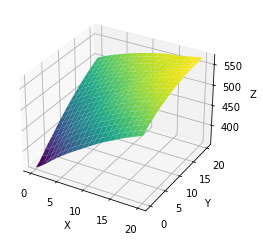

In [34]:
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(V.shape[1])
y = np.arange(V.shape[0])
x, y = np.meshgrid(x, y)

# z = np.log(V)/np.log(10)

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x, y, V, cmap='viridis')

# Add labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Display the plot
plt.show()

In [133]:
pi = np.zeros((21, 21))
for i in tqdm(range(21)):
    for j in range(21):
        count = 0
        action_dict = dict()
        for k in range(-5, 6):
            if i-k >= 0 and j+k >= 0:
                count += 1
                i_ = i-k
                j_ = j+k
                if i_ >= 20:
                    i_ = 20
                if j_ >= 20:
                    j_ = 20
                req1 = p(3, i_)
                ret1 = p(3, 20-i_)
                req2 = p(4, j_)
                ret2 = p(2, 20-j_)
                q_a = 0
                for p1 in range(len(req1)):
                    for p2 in range(len(ret1)):
                        for p3 in range(len(req2)):
                            for p4 in range(len(ret2)):
                                q_a += req1[p1]*ret1[p2]*req2[p3]*ret2[p4]*(-2*abs(k) + 10*(p1+p3) + 0.9*V[i_+p2-p1][j_+p4-p3])
                action_dict[k] = q_a
        lis = sorted(action_dict.items(), key=lambda x: x[1], reverse=True)
#         print(lis)
        pi[i][j] = lis[0][0]

100%|███████████████████████████████████████████| 21/21 [00:18<00:00,  1.14it/s]


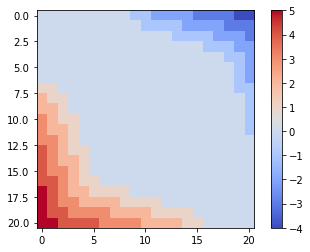

In [33]:
plt.imshow(pi, cmap='coolwarm')
plt.colorbar()
plt.show()

In [8]:
pi = np.load('pi.npy')

In [32]:
# Policy Improvement
do_it()
# while True:
stable = True
for i in tqdm(range(21)):
    for j in range(21):
        old_action = pi[i][j]
        action_dict = dict()
        for k in range(-5, 6):
            if i-k >= 0 and j+k >= 0:
                count += 1
                i_ = i-k
                j_ = j+k
                if i_ >= 20:
                    i_ = 20
                if j_ >= 20:
                    j_ = 20
                req1 = p(3, i_)
                ret1 = p(3, 20-i_)
                req2 = p(4, j_)
                ret2 = p(2, 20-j_)
                q_a = 0
                for p1 in range(len(req1)):
                    for p2 in range(len(ret1)):
                        for p3 in range(len(req2)):
                            for p4 in range(len(ret2)):
                                q_a += req1[p1]*ret1[p2]*req2[p3]*ret2[p4]*(-2*abs(k) + 10*(p1+p3) + 0.9*V[i_+p2-p1][j_+p4-p3])
                action_dict[k] = q_a
        lis = sorted(action_dict.items(), key=lambda x: x[1], reverse=True)
        pi[i][j] = lis[0][0]
        if old_action != lis[0][0]:
            stable = False
else:
    print(stable)

100%|███████████████████████████████████████████| 21/21 [00:02<00:00, 10.26it/s]


0.006174692506476731 ----


100%|███████████████████████████████████████████| 21/21 [00:14<00:00,  1.45it/s]

False


In [28]:
# Policy Evaluation
def do_it():
    while True:
        delta = 0
        for i in tqdm(range(21)):
            for j in range(21):
                v = V[i][j]
                k = int(pi[i][j])
                V[i][j] = 0
                if i-k >= 0 and j+k >= 0:
                    i_ = i-k
                    j_ = j+k
                    if i_ >= 20:
                        i_ = 20
                    if j_ >= 20:
                        j_ = 20
                    req1 = p(3, i_)
                    ret1 = p(3, 20-i_)
                    req2 = p(4, j_)
                    ret2 = p(2, 20-j_)
                    q_a = 0
                    for p1 in range(len(req1)):
                        for p2 in range(len(ret1)):
                            for p3 in range(len(req2)):
                                for p4 in range(len(ret2)):
                                    V[i][j] += req1[p1]*ret1[p2]*req2[p3]*ret2[p4]*(-2*abs(k) + 10*(p1+p3) + 0.9*V[i_+p2-p1][j_+p4-p3])
                    delta = max(delta, abs(v - V[i][j]))
        print(delta, '----')
        if delta < 0.01:
            break

In [30]:
do_it()

100%|███████████████████████████████████████████| 21/21 [00:01<00:00, 10.61it/s]


1.3445340535831747 ----


100%|███████████████████████████████████████████| 21/21 [00:01<00:00, 10.72it/s]


0.795675918634231 ----


100%|███████████████████████████████████████████| 21/21 [00:02<00:00, 10.05it/s]


0.6324407664921523 ----


100%|███████████████████████████████████████████| 21/21 [00:01<00:00, 10.77it/s]


0.4955923657577159 ----


100%|███████████████████████████████████████████| 21/21 [00:01<00:00, 10.71it/s]


0.38803347406150124 ----


100%|███████████████████████████████████████████| 21/21 [00:01<00:00, 10.51it/s]


0.3039826053712318 ----


100%|███████████████████████████████████████████| 21/21 [00:01<00:00, 10.56it/s]


0.23821434240051076 ----


100%|███████████████████████████████████████████| 21/21 [00:01<00:00, 10.51it/s]


0.18670366061411414 ----


100%|███████████████████████████████████████████| 21/21 [00:02<00:00, 10.45it/s]


0.14634239414124295 ----


100%|███████████████████████████████████████████| 21/21 [00:02<00:00, 10.39it/s]


0.11471074862157593 ----


100%|███████████████████████████████████████████| 21/21 [00:02<00:00, 10.29it/s]


0.08991802504351654 ----


100%|███████████████████████████████████████████| 21/21 [00:02<00:00, 10.16it/s]


0.07048456088773492 ----


100%|███████████████████████████████████████████| 21/21 [00:02<00:00,  9.41it/s]


0.05525145331648673 ----


100%|███████████████████████████████████████████| 21/21 [00:02<00:00,  8.68it/s]


0.043310656545543225 ----


100%|███████████████████████████████████████████| 21/21 [00:02<00:00,  8.44it/s]


0.03395053228780398 ----


100%|███████████████████████████████████████████| 21/21 [00:02<00:00,  8.22it/s]


0.02661330701857878 ----


100%|███████████████████████████████████████████| 21/21 [00:02<00:00,  8.77it/s]


0.020861779786457646 ----


100%|███████████████████████████████████████████| 21/21 [00:02<00:00,  8.87it/s]


0.016353248003781573 ----


100%|███████████████████████████████████████████| 21/21 [00:02<00:00,  8.90it/s]


0.012819077798440048 ----


100%|███████████████████████████████████████████| 21/21 [00:02<00:00,  8.87it/s]


0.01004869354397897 ----


100%|███████████████████████████████████████████| 21/21 [00:02<00:00,  8.90it/s]

0.007877029225141996 ----


In [36]:
np.save('v.npy', V)
np.save('pi.npy', pi)

## Exercise on Jack's Car Rental

In [37]:
# Policy Evaluation
while True:
    delta = 0
    for i in tqdm(range(21)):
        for j in range(21):
            v = V[i][j]
            V[i][j] = 0
            count = 0
            for k in range(-5, 6):
                if i-k >= 0 and j+k >= 0:
                    count += 1
                    i_ = i-k
                    j_ = j+k
                    if i_ >= 20:
                        i_ = 20
                    if j_ >= 20:
                        j_ = 20
                    req1 = p(3, i_)
                    ret1 = p(3, 20-i_)
                    req2 = p(4, j_)
                    ret2 = p(2, 20-j_)
                    for p1 in range(len(req1)):
                        for p2 in range(len(ret1)):
                            for p3 in range(len(req2)):
                                for p4 in range(len(ret2)):
                                    V[i][j] += req1[p1]*ret1[p2]*req2[p3]*ret2[p4]*(-2*abs(k) + 10*(p1+p3) + 0.9*V[i_+p2-p1][j_+p4-p3])
                                    if k > 0:
                                        V[i][j] += 2*req1[p1]*ret1[p2]*req2[p3]*ret2[p4]
                                    if i_+p2-p1 > 10:
                                        V[i][j] -= 4*req1[p1]*ret1[p2]*req2[p3]*ret2[p4]
                                    if j_+p4-p3 > 10:
                                        V[i][j] -= 4*req1[p1]*ret1[p2]*req2[p3]*ret2[p4]
            V[i][j] /= count
            delta = max(delta, abs(v-V[i][j]))
    print(delta, '-------')
    if delta < 0.01:
        break

100%|███████████████████████████████████████████| 21/21 [00:34<00:00,  1.64s/it]


65.00126854860662 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.86s/it]


45.42507185179625 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.86s/it]


40.39761663427049 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.84s/it]


35.996090531828145 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.85s/it]


32.09726332555192 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.85s/it]


28.623589563739756 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.84s/it]


25.525973800774295 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.90s/it]


22.76415308314256 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.90s/it]


20.30161357822533 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.85s/it]


18.10573075828995 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.86s/it]


16.14750754291788 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.87s/it]


14.401156261747701 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.85s/it]


12.843718117690742 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.86s/it]


11.454738042815848 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.86s/it]


10.215984155834462 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.87s/it]


9.111202352486202 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.84s/it]


8.125899775858215 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.83s/it]


7.247152884048205 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.85s/it]


6.463436901970226 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.84s/it]


5.764474066956609 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.85s/it]


5.141098486238548 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.86s/it]


4.585135726650606 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.86s/it]


4.08929549516904 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.86s/it]


3.6470759664344996 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.85s/it]


3.2526784807868125 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.85s/it]


2.9009314818705434 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.85s/it]


2.587222688181896 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.86s/it]


2.3074386049590885 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.85s/it]


2.0579105804880555 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.86s/it]


1.8353666976595377 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.86s/it]


1.636888869178506 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.86s/it]


1.459874573136858 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.85s/it]


1.3020027270763421 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.87s/it]


1.1612032524745928 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.88s/it]


1.0356299308494954 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.85s/it]


0.9236361952366678 -------


100%|███████████████████████████████████████████| 21/21 [00:41<00:00,  1.97s/it]


0.8237535396826843 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.86s/it]


0.7346722635350034 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.86s/it]


0.6552242981111931 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.84s/it]


0.5843678905143861 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.85s/it]


0.521173943753297 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.87s/it]


0.46481383398167964 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.86s/it]


0.41454854537266783 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.87s/it]


0.3697189797453575 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.86s/it]


0.3297373142736433 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.87s/it]


0.2940792936788057 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.85s/it]


0.2622773560257201 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.85s/it]


0.23391450184067253 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.86s/it]


0.2086188262903761 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.88s/it]


0.18605864252253923 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.88s/it]


0.1659381325864615 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.84s/it]


0.14799346848803907 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.86s/it]


0.131989352726805 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.86s/it]


0.11771593309231321 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.84s/it]


0.1049860508958318 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.85s/it]


0.09363278694661403 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.87s/it]


0.08350727277354508 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.86s/it]


0.07447673870819926 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.87s/it]


0.06642277280855069 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.87s/it]


0.05923976835299527 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.86s/it]


0.052833538936511104 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.86s/it]


0.047120083601839724 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.86s/it]


0.0420244852673477 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.85s/it]


0.037479928442849086 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.83s/it]


0.033426823121317284 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.86s/it]


0.029812023418799072 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.86s/it]


0.026588130653180997 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.85s/it]


0.023712871854058903 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.85s/it]


0.021148545548840048 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.86s/it]


0.018861527243075216 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.85s/it]


0.016821828673641903 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.87s/it]


0.015002704517314669 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.86s/it]


0.013380301712459186 -------


100%|███████████████████████████████████████████| 21/21 [00:39<00:00,  1.87s/it]


0.011933346647879262 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.86s/it]


0.010642866317652988 -------


100%|███████████████████████████████████████████| 21/21 [00:38<00:00,  1.85s/it]

0.009491939404369987 -------


In [38]:
pi_1 = np.zeros((21, 21))

In [73]:
# Policy Improvement
# do_it()
# while True:
stable = True
for i in tqdm(range(21)):
    for j in range(21):
        old_action = pi_1[i][j]
        action_dict = dict()
        for k in range(-5, 6):
            if i-k >= 0 and j+k >= 0:
                count += 1
                i_ = i-k
                j_ = j+k
                if i_ >= 20:
                    i_ = 20
                if j_ >= 20:
                    j_ = 20
                req1 = p(3, i_)
                ret1 = p(3, 20-i_)
                req2 = p(4, j_)
                ret2 = p(2, 20-j_)
                q_a = 0
                for p1 in range(len(req1)):
                    for p2 in range(len(ret1)):
                        for p3 in range(len(req2)):
                            for p4 in range(len(ret2)):
                                q_a += req1[p1]*ret1[p2]*req2[p3]*ret2[p4]*(-2*abs(k) + 10*(p1+p3) + 0.9*V[i_+p2-p1][j_+p4-p3])
                                if k > 0:
                                        q_a += 2*req1[p1]*ret1[p2]*req2[p3]*ret2[p4]
                                if i_+p2-p1 > 10:
                                    q_a -= 4*req1[p1]*ret1[p2]*req2[p3]*ret2[p4]
                                if j_+p4-p3 > 10:
                                    q_a -= 4*req1[p1]*ret1[p2]*req2[p3]*ret2[p4]
                action_dict[k] = q_a
        lis = sorted(action_dict.items(), key=lambda x: x[1], reverse=True)
        pi_1[i][j] = lis[0][0]
        if old_action != lis[0][0]:
            stable = False
else:
    print(stable)

100%|███████████████████████████████████████████| 21/21 [00:24<00:00,  1.17s/it]

False


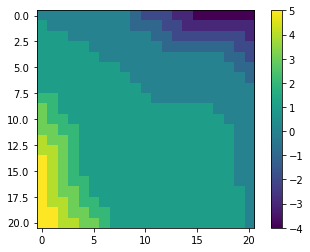

In [74]:
plt.imshow(pi_1, cmap='viridis')
plt.colorbar()
plt.show()

In [62]:
# Policy Evaluation
def do_it():
    while True:
        delta = 0
        for i in tqdm(range(21)):
            for j in range(21):
                v = V[i][j]
                k = int(pi_1[i][j])
                V[i][j] = 0
                if i-k >= 0 and j+k >= 0:
                    i_ = i-k
                    j_ = j+k
                    if i_ >= 20:
                        i_ = 20
                    if j_ >= 20:
                        j_ = 20
                    req1 = p(3, i_)
                    ret1 = p(3, 20-i_)
                    req2 = p(4, j_)
                    ret2 = p(2, 20-j_)
                    q_a = 0
                    for p1 in range(len(req1)):
                        for p2 in range(len(ret1)):
                            for p3 in range(len(req2)):
                                for p4 in range(len(ret2)):
                                    V[i][j] += req1[p1]*ret1[p2]*req2[p3]*ret2[p4]*(-2*abs(k) + 10*(p1+p3) + 0.9*V[i_+p2-p1][j_+p4-p3])
                                    if k > 0:
                                        V[i][j] += 2*req1[p1]*ret1[p2]*req2[p3]*ret2[p4]
                                    if i_+p2-p1 > 10:
                                        V[i][j] -= 4*req1[p1]*ret1[p2]*req2[p3]*ret2[p4]
                                    if j_+p4-p3 > 10:
                                        V[i][j] -= 4*req1[p1]*ret1[p2]*req2[p3]*ret2[p4]
                    delta = max(delta, abs(v - V[i][j]))
        print(delta, '----')
        if delta < 0.01:
            break

In [72]:
do_it()

100%|███████████████████████████████████████████| 21/21 [00:03<00:00,  5.73it/s]


9.803886801072395 ----


100%|███████████████████████████████████████████| 21/21 [00:03<00:00,  5.74it/s]


1.8819907861676484 ----


100%|███████████████████████████████████████████| 21/21 [00:03<00:00,  5.79it/s]


0.6845560207282233 ----


100%|███████████████████████████████████████████| 21/21 [00:03<00:00,  5.72it/s]


0.34252663383790605 ----


100%|███████████████████████████████████████████| 21/21 [00:03<00:00,  5.67it/s]


0.20299370638849723 ----


100%|███████████████████████████████████████████| 21/21 [00:03<00:00,  5.53it/s]


0.1571023261505502 ----


100%|███████████████████████████████████████████| 21/21 [00:03<00:00,  5.31it/s]


0.12738741782345642 ----


100%|███████████████████████████████████████████| 21/21 [00:04<00:00,  4.82it/s]


0.10041029627512899 ----


100%|███████████████████████████████████████████| 21/21 [00:04<00:00,  4.78it/s]


0.07752300471099716 ----


100%|███████████████████████████████████████████| 21/21 [00:04<00:00,  4.72it/s]


0.06057316965222981 ----


100%|███████████████████████████████████████████| 21/21 [00:04<00:00,  4.83it/s]


0.047250608983119946 ----


100%|███████████████████████████████████████████| 21/21 [00:04<00:00,  4.77it/s]


0.03682506078689585 ----


100%|███████████████████████████████████████████| 21/21 [00:04<00:00,  4.84it/s]


0.02868474246133701 ----


100%|███████████████████████████████████████████| 21/21 [00:04<00:00,  4.75it/s]


0.022336720593614245 ----


100%|███████████████████████████████████████████| 21/21 [00:04<00:00,  4.73it/s]


0.01739007910714463 ----


100%|███████████████████████████████████████████| 21/21 [00:04<00:00,  4.74it/s]


0.013537221382307507 ----


100%|███████████████████████████████████████████| 21/21 [00:04<00:00,  4.84it/s]


0.010537153438463065 ----


100%|███████████████████████████████████████████| 21/21 [00:04<00:00,  4.87it/s]

0.008201540201696389 ----


In [75]:
np.save('v_exercise.npy', V)
np.save('pi_exercise.npy', pi_1)

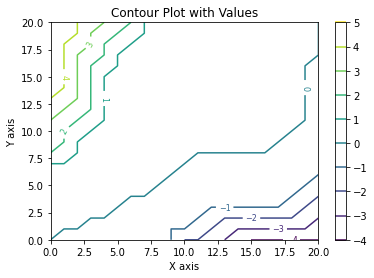

In [76]:
x = np.arange(21)
y = np.arange(21)
X, Y = np.meshgrid(x, y)
Z = pi_1

# Create a contour plot
contours = plt.contour(X, Y, Z, 10, cmap='viridis')

# Add contour labels
plt.clabel(contours, inline=True, fontsize=8)

# Optionally add a color bar
plt.colorbar(contours)

# Show plot
plt.title("Contour Plot with Values")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()